In [1]:
#Import Libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib

import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)


In [3]:
#Read Data set

df = pd.read_csv('movies.csv')

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
#Let's see if there is any missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))
    

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [5]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [6]:
#As the column Budget and Gross contains Null Value, it won't be possible to convert the colums dtype to int64
# Filling the Null value with the column mean

df['budget'].fillna(df['budget'].mean(), inplace = True)
df['gross'].fillna(df['gross'].mean(), inplace = True)

In [7]:
#Changing the data type from Float to Integer for Budget and Gross Columns as the values consists of non integer values.


df['budget']= df['budget'].astype('int64')
df['gross']= df['gross'].astype('int64')

In [8]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

In [9]:
df.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000,39754601,Paramount Pictures,95.0
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000,115229890,Universal Pictures,133.0
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000,23402427,Chartoff-Winkler Productions,129.0
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000,108185706,Dovemead Films,127.0
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000,15795189,United Artists,100.0


In [10]:
#The 'release' column has the country included in it, so let's remove the country from it and put it 
#into a new column 'release_year

df = df.assign(release_country = df['released'].str.extract(r'\((.*)\)',expand=False))


In [11]:
df['released']=df['released'].str.extract(r'(.*)\(.*\)',expand = False)

In [12]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_country
0,The Shining,R,Drama,1980,"June 13, 1980",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,United States
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,United States
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,United States
3,Airplane!,PG,Comedy,1980,"July 2, 1980",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,United States
4,Caddyshack,R,Comedy,1980,"July 25, 1980",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,United States


In [13]:
#Converting Date Type from Object to Datatype and also changing the format of the date.

df['released'] = pd.to_datetime(df['released'])

In [14]:
#Although there is a Year Column in the dataframe, some of the year doesn't match with release year column. 
#Let's create a new column and extract the released year from release column and put that value in it

df['correct_year'] = df['released'].astype(str).str[:4]


In [15]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_country,correct_year
0,The Shining,R,Drama,1980,1980-06-13,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,United States,1980
1,The Blue Lagoon,R,Adventure,1980,1980-07-02,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,United States,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,1980-06-20,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,United States,1980
3,Airplane!,PG,Comedy,1980,1980-07-02,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,United States,1980
4,Caddyshack,R,Comedy,1980,1980-07-25,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,United States,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,2020-10-23,3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,78500541,NaN,90.0,United States,2020
7664,Dream Round,NaN,Comedy,2020,2020-02-07,4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,35589876,78500541,Cactus Blue Entertainment,90.0,United States,2020
7665,Saving Mbango,NaN,Drama,2020,2020-04-27,5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,78500541,Embi Productions,NaN,Cameroon,2020
7666,It's Just Us,NaN,Drama,2020,2020-10-01,NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000,78500541,NaN,120.0,United States,2020


In [16]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_country,correct_year
0,The Shining,R,Drama,1980,1980-06-13,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,United States,1980
1,The Blue Lagoon,R,Adventure,1980,1980-07-02,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,United States,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,1980-06-20,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,United States,1980
3,Airplane!,PG,Comedy,1980,1980-07-02,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,United States,1980
4,Caddyshack,R,Comedy,1980,1980-07-25,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,United States,1980


In [17]:
different_value_rows = df.query('year != correct_year').shape[0]
print(different_value_rows)

7668


In [16]:
df.sort_values(by=['gross'],inplace = False, ascending = False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_country,correct_year
5445,Avatar,PG-13,Action,2009,2009-12-18,7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,United States,2009
7445,Avengers: Endgame,PG-13,Action,2019,2019-04-26,8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,United States,2019
3045,Titanic,PG-13,Drama,1997,1997-12-19,7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,United States,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,2015-12-18,7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,United States,2015
7244,Avengers: Infinity War,PG-13,Action,2018,2018-04-27,8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,United States,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,"Love, Honor and Obey",R,Comedy,2000,2001-02-09,6.5,5200.0,Dominic Anciano,Dominic Anciano,Sadie Frost,United Kingdom,35589876,1400,British Broadcasting Corporation (BBC),103.0,United States,2001
7625,The Untold Story,NaN,Comedy,2019,2019-01-11,5.7,320.0,Shane Stanley,Lee Stanley,Miko Hughes,United States,35589876,790,Visual Arts Entertainment,104.0,United States,2019
7580,Run with the Hunted,Not Rated,Crime,2019,2020-06-26,5.2,735.0,John Swab,John Swab,Ron Perlman,United States,35589876,682,Roxwell Films,93.0,United States,2020
2417,Madadayo,NaN,Drama,1993,1993-04-17,7.3,5100.0,Akira Kurosawa,Ishirô Honda,Tatsuo Matsumura,Japan,11900000,596,DENTSU Music And Entertainment,134.0,Japan,1993


In [23]:

df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_country,correct_year
0,The Shining,R,Drama,1980,1980-06-13,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,United States,1980
1,The Blue Lagoon,R,Adventure,1980,1980-07-02,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,United States,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,1980-06-20,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,United States,1980
3,Airplane!,PG,Comedy,1980,1980-07-02,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,United States,1980
4,Caddyshack,R,Comedy,1980,1980-07-25,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,United States,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,2020-10-23,3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,78500541,NaN,90.0,United States,2020
7664,Dream Round,NaN,Comedy,2020,2020-02-07,4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,35589876,78500541,Cactus Blue Entertainment,90.0,United States,2020
7665,Saving Mbango,NaN,Drama,2020,2020-04-27,5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,78500541,Embi Productions,NaN,Cameroon,2020
7666,It's Just Us,NaN,Drama,2020,2020-10-01,NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000,78500541,NaN,120.0,United States,2020


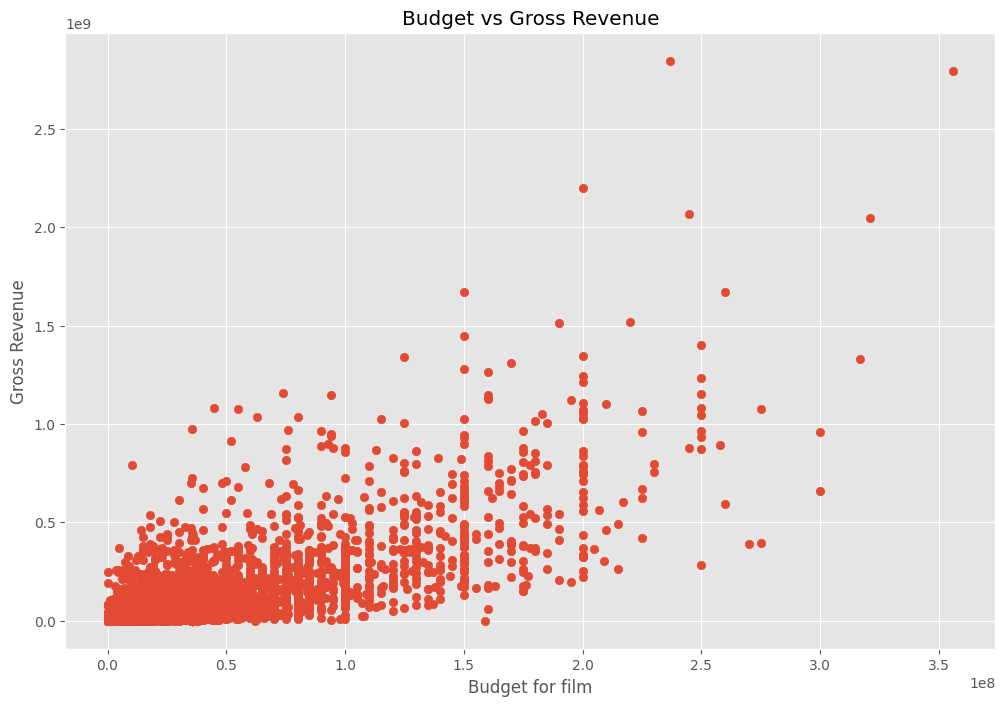

In [17]:
# Building Scatter Plot Budget vs Gross Revenue

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Revenue')

plt.xlabel('Budget for film')
plt.ylabel('Gross Revenue')
plt.show()

<AxesSubplot: xlabel='budget', ylabel='gross'>

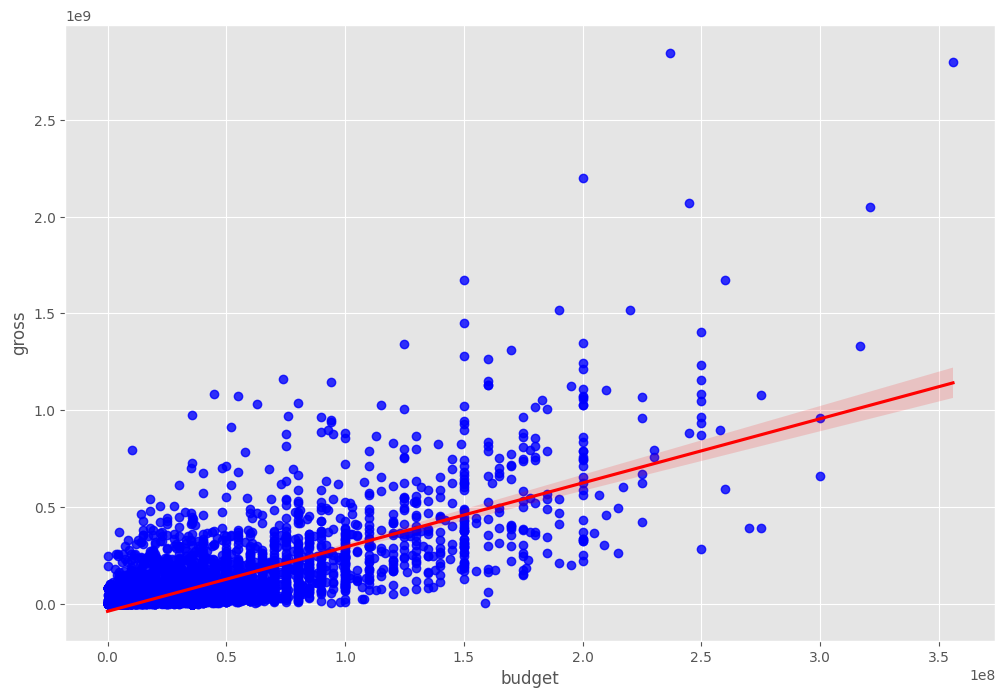

In [18]:
#Budget vs Gross Seaborn

sns.regplot(x = df['budget'],y =df['gross'],scatter_kws = {"color" : "blue"}, line_kws = {"color" : "red"})



In [19]:
df


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_country,correct_year
0,The Shining,R,Drama,1980,1980-06-13,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,United States,1980
1,The Blue Lagoon,R,Adventure,1980,1980-07-02,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,United States,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,1980-06-20,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,United States,1980
3,Airplane!,PG,Comedy,1980,1980-07-02,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,United States,1980
4,Caddyshack,R,Comedy,1980,1980-07-25,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,United States,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,2020-10-23,3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,78500541,NaN,90.0,United States,2020
7664,Dream Round,NaN,Comedy,2020,2020-02-07,4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,35589876,78500541,Cactus Blue Entertainment,90.0,United States,2020
7665,Saving Mbango,NaN,Drama,2020,2020-04-27,5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,78500541,Embi Productions,NaN,Cameroon,2020
7666,It's Just Us,NaN,Drama,2020,2020-10-01,NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000,78500541,NaN,120.0,United States,2020


,year,score,votes,budget,gross,runtime
0,1980,8.4,927000.0,19000000,46998772,146.0
1,1980,5.8,65000.0,4500000,58853106,104.0
2,1980,8.7,1200000.0,18000000,538375067,124.0
3,1980,7.7,221000.0,3500000,83453539,88.0
4,1980,7.3,108000.0,6000000,39846344,98.0
...,...,...,...,...,...,...
7663,2020,3.1,18.0,7000,78500541,90.0
7664,2020,4.7,36.0,35589876,78500541,90.0
7665,2020,5.7,29.0,58750,78500541,NaN
7666,2020,NaN,NaN,15000,78500541,120.0


In [29]:
df.corr(method = 'pearson', numeric_only = True)

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.265578,0.252042,0.120811
score,0.097995,1.000000,0.409182,0.064554,0.182868,0.399451
votes,0.222945,0.409182,1.000000,0.421090,0.628713,0.309212
budget,0.265578,0.064554,0.421090,1.000000,0.711270,0.265305
gross,0.252042,0.182868,0.628713,0.711270,1.000000,0.241336
runtime,0.120811,0.399451,0.309212,0.265305,0.241336,1.000000


In [30]:
#High Corelation between budget and gross

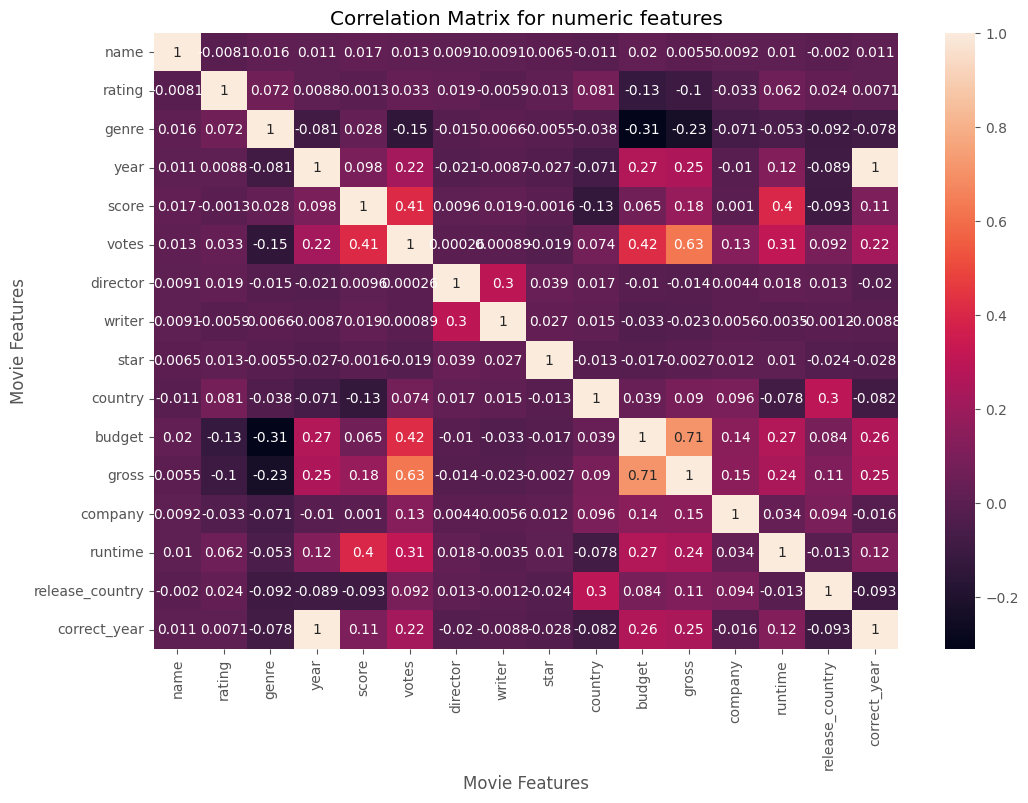

In [40]:
correlation_matrix = df.corr(method = 'pearson', numeric_only = True)

sns.heatmap(correlation_matrix,annot = True)

plt.title('Correlation Matrix for numeric features')

plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [37]:
df_string_to_numeric = df

for col_name in df_string_to_numeric.columns:
    if (df_string_to_numeric[col_name].dtype == 'object'):
        df_string_to_numeric[col_name] = df_string_to_numeric[col_name].astype('category')
        df_string_to_numeric[col_name] = df_string_to_numeric[col_name].cat.codes
df_string_to_numeric

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_country,correct_year
0,6587,6,6,1980,1980-06-13,8.4,927000.0,2589,4014,1047,54,19000000,46998772,2319,146.0,56,0
1,5573,6,1,1980,1980-07-02,5.8,65000.0,2269,1632,327,55,4500000,58853106,731,104.0,56,0
2,5142,4,0,1980,1980-06-20,8.7,1200000.0,1111,2567,1745,55,18000000,538375067,1540,124.0,56,0
3,286,4,4,1980,1980-07-02,7.7,221000.0,1301,2000,2246,55,3500000,83453539,1812,88.0,56,0
4,1027,6,4,1980,1980-07-25,7.3,108000.0,1054,521,410,55,6000000,39846344,1777,98.0,56,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,3705,-1,6,2020,2020-10-23,3.1,18.0,1500,2289,2421,55,7000,78500541,-1,90.0,56,40
7664,1678,-1,4,2020,2020-02-07,4.7,36.0,774,2614,1886,55,35589876,78500541,539,90.0,56,40
7665,4717,-1,6,2020,2020-04-27,5.7,29.0,2061,2683,2040,55,58750,78500541,941,NaN,8,40
7666,2843,-1,6,2020,2020-10-01,NaN,NaN,1184,1824,450,55,15000,78500541,-1,120.0,56,40


In [38]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_country,correct_year
0,6587,6,6,1980,1980-06-13,8.4,927000.0,2589,4014,1047,54,19000000,46998772,2319,146.0,56,0
1,5573,6,1,1980,1980-07-02,5.8,65000.0,2269,1632,327,55,4500000,58853106,731,104.0,56,0
2,5142,4,0,1980,1980-06-20,8.7,1200000.0,1111,2567,1745,55,18000000,538375067,1540,124.0,56,0
3,286,4,4,1980,1980-07-02,7.7,221000.0,1301,2000,2246,55,3500000,83453539,1812,88.0,56,0
4,1027,6,4,1980,1980-07-25,7.3,108000.0,1054,521,410,55,6000000,39846344,1777,98.0,56,0


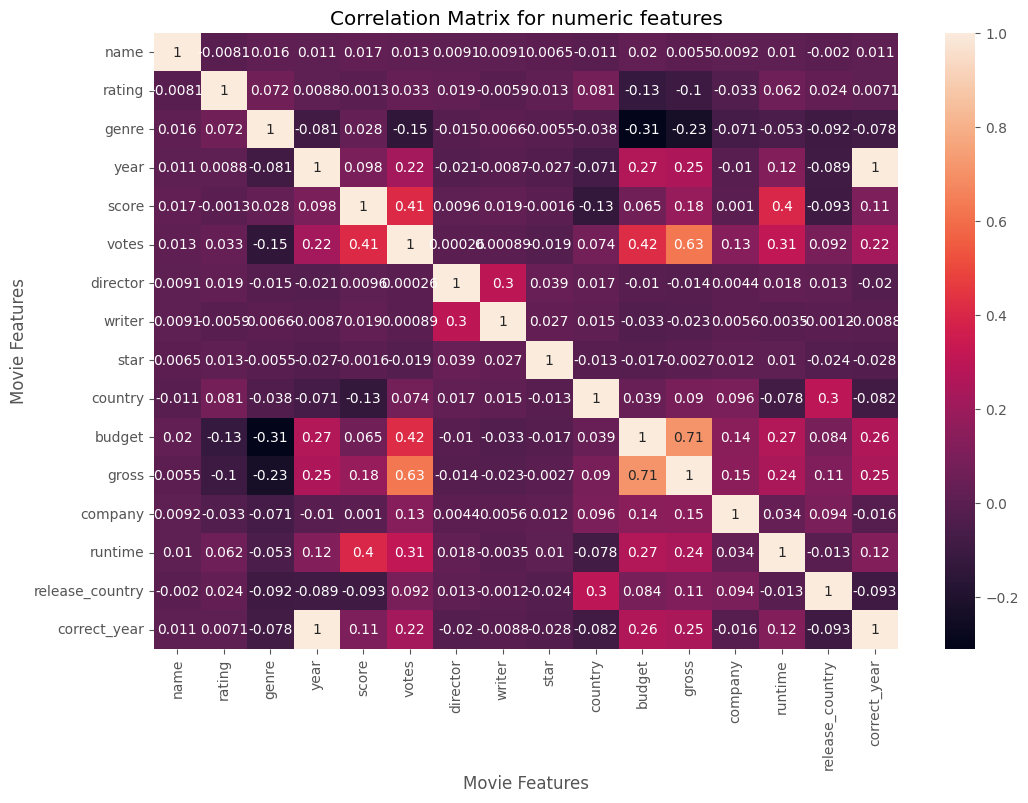

In [39]:
correlation_matrix = df_string_to_numeric.corr(method = 'pearson', numeric_only = True)

sns.heatmap(correlation_matrix,annot = True)

plt.title('Correlation Matrix for numeric features')

plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [42]:
df.corr(numeric_only = True)

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,release_country,correct_year
name,1.000000,-0.008069,0.016355,0.011453,0.017097,0.013088,0.009079,0.009081,0.006472,-0.010737,0.020368,0.005466,0.009211,0.010392,-0.001968,0.011134
rating,-0.008069,1.000000,0.072423,0.008779,-0.001314,0.033225,0.019483,-0.005921,0.013405,0.081244,-0.126046,-0.102116,-0.032943,0.062145,0.023977,0.007054
genre,0.016355,0.072423,1.000000,-0.081261,0.027965,-0.145307,-0.015258,0.006567,-0.005477,-0.037615,-0.310566,-0.230267,-0.071067,-0.052711,-0.091572,-0.077550
year,0.011453,0.008779,-0.081261,1.000000,0.097995,0.222945,-0.020795,-0.008656,-0.027242,-0.070938,0.265578,0.252042,-0.010431,0.120811,-0.089289,0.997295
score,0.017097,-0.001314,0.027965,0.097995,1.000000,0.409182,0.009559,0.019416,-0.001609,-0.133348,0.064554,0.182868,0.001030,0.399451,-0.092763,0.105601
votes,0.013088,0.033225,-0.145307,0.222945,0.409182,1.000000,0.000260,0.000892,-0.019282,0.073625,0.421090,0.628713,0.133204,0.309212,0.092014,0.218364
director,0.009079,0.019483,-0.015258,-0.020795,0.009559,0.000260,1.000000,0.299067,0.039234,0.017490,-0.010364,-0.014272,0.004404,0.017624,0.013331,-0.020439
writer,0.009081,-0.005921,0.006567,-0.008656,0.019416,0.000892,0.299067,1.000000,0.027245,0.015343,-0.033216,-0.023210,0.005646,-0.003511,-0.001201,-0.008807
star,0.006472,0.013405,-0.005477,-0.027242,-0.001609,-0.019282,0.039234,0.027245,1.000000,-0.012998,-0.016628,-0.002682,0.012442,0.010174,-0.023540,-0.027576
country,-0.010737,0.081244,-0.037615,-0.070938,-0.133348,0.073625,0.017490,0.015343,-0.012998,1.000000,0.039000,0.089949,0.095548,-0.078412,0.297363,-0.082274
